# Chronos

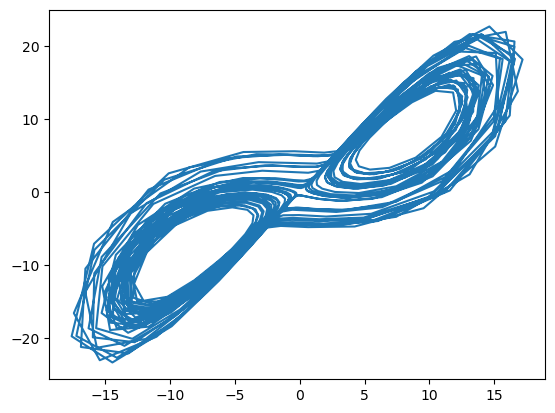

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Make dataset
from dysts.flows import Lorenz
from dysts.flows import Rossler

#model = Rossler()
#model.ic = np.array([-3.81655523,3.10429694,0.0219432])

model = Lorenz()
# model.ic = np.array([-2.63697978,0.6028729,25.95497073])
#model.ic = np.array([-1.83635088,3.07872907,27.71047215])
# model.ic = np.array([0.0860347,3.67362353,25.42185244])
#model.ic = np.array([-3.57107972,-5.32715247,16.39721569])
#model.ic = np.array([-3.86053107,-0.51336906,26.85695207])
#model.ic = np.array([-1.34211979,1.52646597,24.74616521])
#model.ic = np.array([-5.90069824,-10.5759444,12.28690179])
# model.ic = np.array([-4.79273952,-7.96640585,14.86802532])
#model.ic = np.array([-8.21447797,-15.4514944,11.39810828])
#model.ic = np.array([-2.14483103,-3.75576117,19.53688129])
#model.ic = np.array([-1.93971829,-3.65788245,8.71007293])
#model.ic = np.array([14.36703466,11.87431741,37.24349411])

# traj = model.make_trajectory(1024,
# pts_per_period=30,
# method="Radau",
# atol=1e-12,
# rtol=1e-12)
traj = model.make_trajectory(1024,
                            # timescale="Lyapunov",
                            pts_per_period=30,
                            method="Radau", 
                            atol=1e-12,
                            rtol=1e-12)

plt.plot(traj[:,0], traj[:,1])

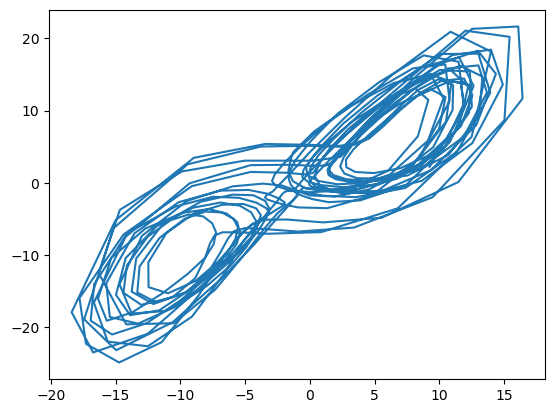

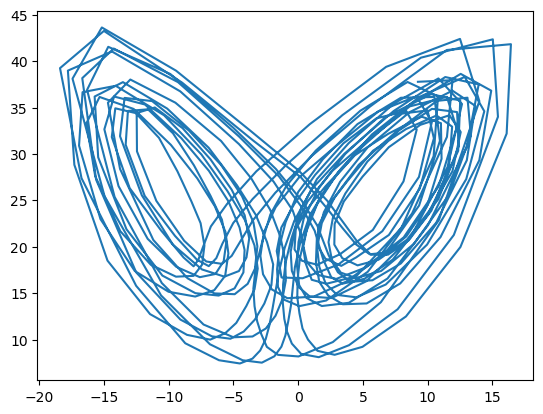

In [6]:

## Imports
import pandas as pd # requires: pip install pandas
import torch
from chronos import ChronosPipeline

## Set hyperparameters
context_length = 512
current_context_x = np.copy(traj[:context_length, 0])
current_context_y = np.copy(traj[:context_length, 1])
current_context_z = np.copy(traj[:context_length, 2])
forecast_length = 64 # Number of points for model to predict simultaneously
forecast_total_length = 512 # total number of points to forecast
n_average = 2
forecast_agg_x = []
forecast_agg_y = []
forecast_agg_z = []

## Instantiate model
pipeline = ChronosPipeline.from_pretrained(
        "amazon/chronos-t5-base",
        device_map="cpu",
        torch_dtype=torch.bfloat16,
    )
current_context_xyz = np.array([current_context_x, current_context_y,  current_context_z])
forecast_xyz2 = pipeline.predict(
    context=torch.tensor(current_context_xyz),
    prediction_length=forecast_total_length,
    num_samples=n_average,
    limit_prediction_length=False,
)

plt.figure()
plt.plot(
    np.mean(forecast_xyz2[0, :, :].detach().numpy(), axis=0), 
    np.mean(forecast_xyz2[1, :, :].detach().numpy(), axis=0)
)

plt.figure()
plt.plot(
    np.mean(forecast_xyz2[0, :, :].detach().numpy(), axis=0), 
    np.mean(forecast_xyz2[2, :, :].detach().numpy(), axis=0)
)